In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from PIL import Image
import matplotlib.pyplot as mpimg
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

import os

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Chest X ray/Chest_xray_Corona_Metadata.csv')
train_df.shape

(5910, 6)

In [ ]:
train_df.head(5)

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910 entries, 0 to 5909
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5910 non-null   int64 
 1   X_ray_image_name        5910 non-null   object
 2   Label                   5910 non-null   object
 3   Dataset_type            5910 non-null   object
 4   Label_2_Virus_category  69 non-null     object
 5   Label_1_Virus_category  4334 non-null   object
dtypes: int64(1), object(5)
memory usage: 277.2+ KB


<AxesSubplot:>

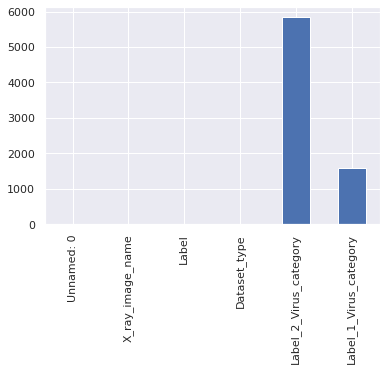

In [ ]:
missing_vals = train_df.isnull().sum()
missing_vals.plot(kind = 'bar')

In [ ]:
train_df.dropna(how = 'all')
train_df.isnull().sum()

Unnamed: 0                   0
X_ray_image_name             0
Label                        0
Dataset_type                 0
Label_2_Virus_category    5841
Label_1_Virus_category    1576
dtype: int64

In [ ]:
train_df.fillna('unknown', inplace=True)
train_df.isnull().sum()

Unnamed: 0                0
X_ray_image_name          0
Label                     0
Dataset_type              0
Label_2_Virus_category    0
Label_1_Virus_category    0
dtype: int64

In [ ]:
train_data = train_df[train_df['Dataset_type'] == 'TRAIN']
test_data = train_df[train_df['Dataset_type'] == 'TEST']
assert train_data.shape[0] + test_data.shape[0] == train_df.shape[0]
print(f"Shape of train data : {train_data.shape}")
print(f"Shape of test data : {test_data.shape}")
test_data.sample(10)

Shape of train data : (5286, 6)
Shape of test data : (624, 6)


,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
5424,5447,NORMAL2-IM-0274-0001.jpeg,Normal,TEST,unknown,unknown
5566,5589,person150_bacteria_716.jpeg,Pnemonia,TEST,unknown,bacteria
5584,5607,person142_bacteria_682.jpeg,Pnemonia,TEST,unknown,bacteria
5362,5385,IM-0037-0001.jpeg,Normal,TEST,unknown,unknown
5307,5330,NORMAL2-IM-0058-0001.jpeg,Normal,TEST,unknown,unknown
5903,5926,person1641_virus_2840.jpeg,Pnemonia,TEST,unknown,Virus
5627,5650,person128_bacteria_607.jpeg,Pnemonia,TEST,unknown,bacteria
5772,5795,person78_bacteria_387.jpeg,Pnemonia,TEST,unknown,bacteria
5616,5639,person133_bacteria_635.jpeg,Pnemonia,TEST,unknown,bacteria
5901,5924,person1643_virus_2843.jpeg,Pnemonia,TEST,unknown,Virus


In [ ]:
print((train_df['Label_1_Virus_category']).value_counts())
print('--------------------------')
print((train_df['Label_2_Virus_category']).value_counts())
print('--------------------------')
print((train_df[train_df['Label']=='Normal']).value_counts())
print('--------------------------')
print((train_df[train_df['Label']=='Pnemonia']).value_counts())

bacteria          2777
unknown           1576
Virus             1555
Stress-Smoking       2
Name: Label_1_Virus_category, dtype: int64
--------------------------
unknown          5841
COVID-19           58
Streptococcus       5
SARS                4
ARDS                2
Name: Label_2_Virus_category, dtype: int64
--------------------------
Unnamed: 0  X_ray_image_name           Label   Dataset_type  Label_2_Virus_category  Label_1_Virus_category
0           IM-0128-0001.jpeg          Normal  TRAIN         unknown                 unknown                   1
1058        NORMAL2-IM-1044-0001.jpeg  Normal  TRAIN         unknown                 unknown                   1
1056        NORMAL2-IM-1046-0001.jpeg  Normal  TRAIN         unknown                 unknown                   1
1055        NORMAL2-IM-1047-0001.jpeg  Normal  TRAIN         unknown                 unknown                   1
1054        NORMAL2-IM-1048-0001.jpeg  Normal  TRAIN         unknown                 unknown      

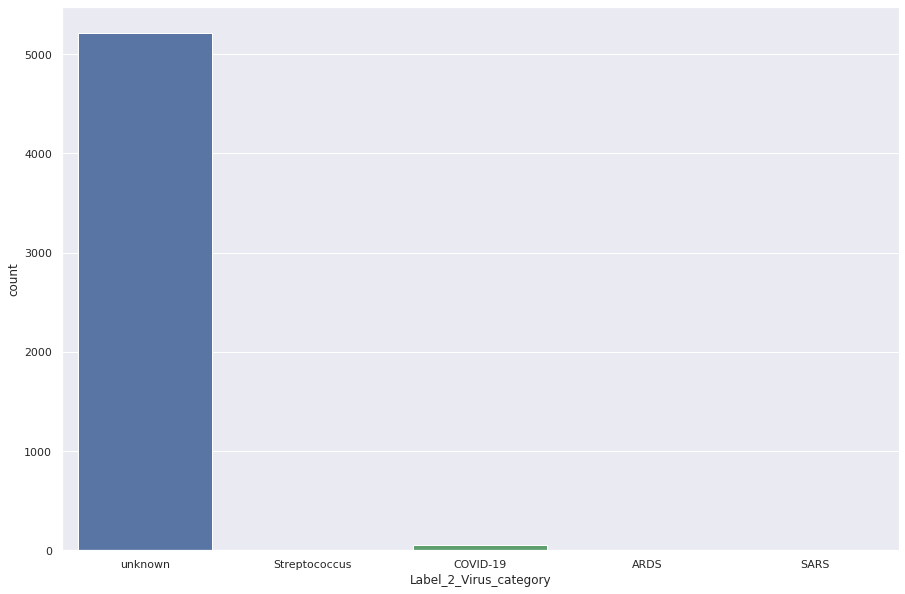

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(train_data['Label_2_Virus_category']);

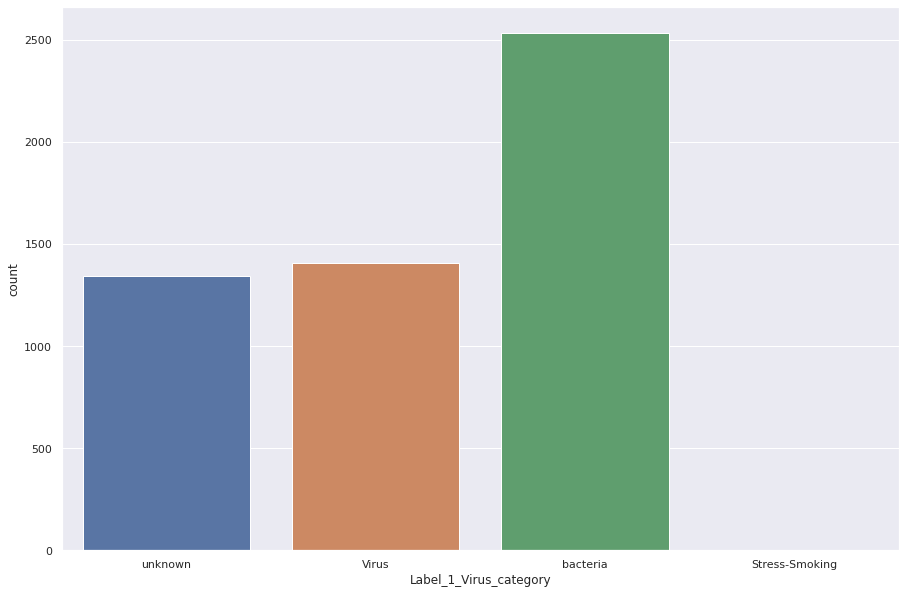

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(train_data['Label_1_Virus_category']);

In [ ]:
test_img_dir = '/content/drive/MyDrive/Chest X ray/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test'
train_img_dir = '/content/drive/MyDrive/Chest X ray/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train'

sample_train_images = list(os.walk(train_img_dir))[0][2][:8]
sample_train_images = list(map(lambda x: os.path.join(train_img_dir, x), sample_train_images))

sample_test_images = list(os.walk(test_img_dir))[0][2][:8]
sample_test_images = list(map(lambda x: os.path.join(test_img_dir, x), sample_test_images))

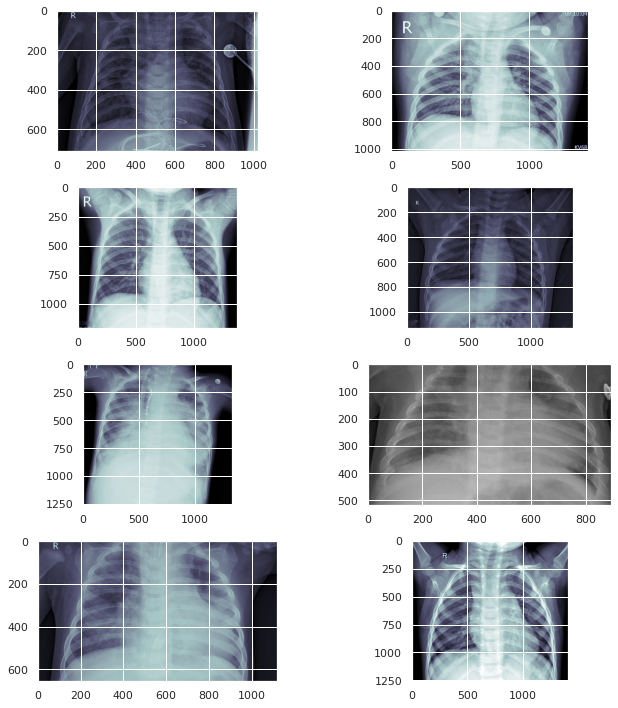

In [ ]:
plt.figure(figsize = (10,10))
for iterator, filename in enumerate(sample_train_images):
    image = Image.open(filename)
    plt.subplot(4,2,iterator+1)
    plt.imshow(image, cmap=plt.cm.bone)

plt.tight_layout()

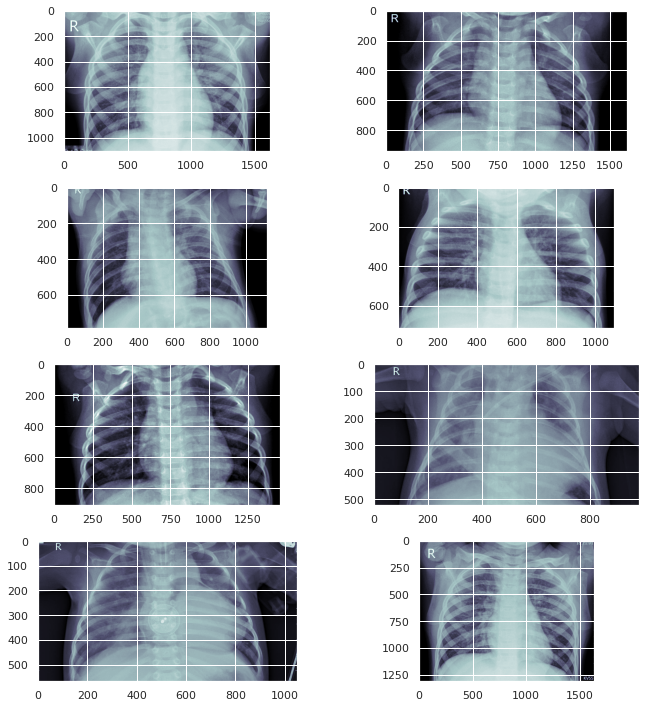

In [ ]:
plt.figure(figsize = (10,10))
for iterator, filename in enumerate(sample_test_images):
    image = Image.open(filename)
    plt.subplot(4,2,iterator+1)
    plt.imshow(image, cmap=plt.cm.bone)

plt.tight_layout()

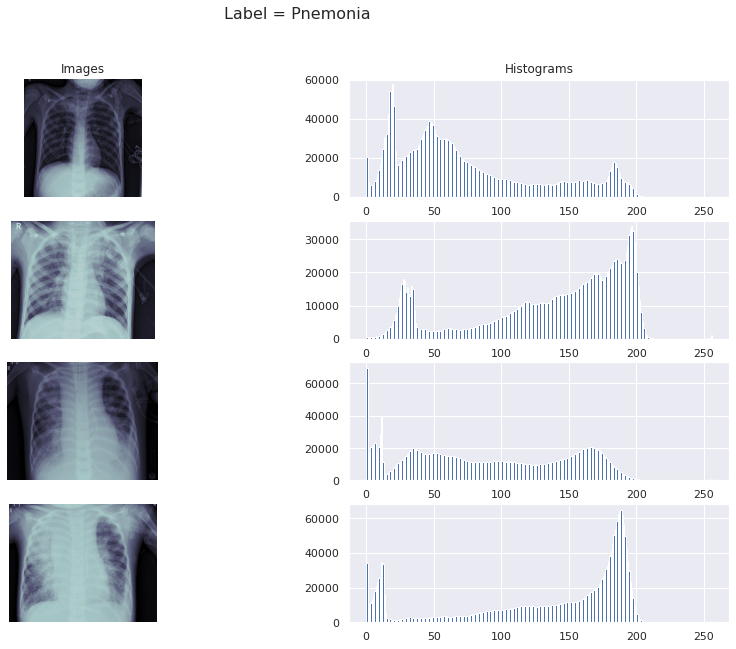

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(15, 10))

pneumonia_path = train_data[train_data['Label']=='Pnemonia']['X_ray_image_name'].values

sample_covid_path = pneumonia_path[:4]
sample_covid_path = list(map(lambda x: os.path.join(train_img_dir, x), sample_covid_path))

for row, file in enumerate(sample_covid_path):
    image = plt.imread(file)
    ax[row, 0].imshow(image, cmap=plt.cm.bone)
    ax[row, 1].hist(image.ravel(), 256, [0,256])
    ax[row, 0].axis('off')
    if row == 0:
        ax[row, 0].set_title('Images')
        ax[row, 1].set_title('Histograms')
fig.suptitle('Label = Pnemonia', size=16)
plt.show()

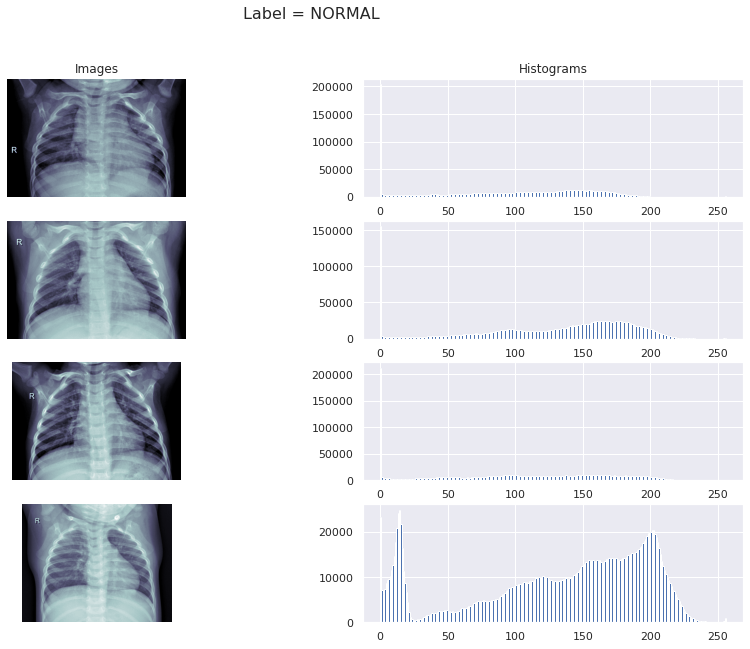

In [ ]:
fig, ax = plt.subplots(4, 2, figsize=(15, 10))

normal_path = train_data[train_data['Label']=='Normal']['X_ray_image_name'].values

sample_normal_path = normal_path[:4]
sample_normal_path = list(map(lambda x: os.path.join(train_img_dir, x), sample_normal_path))

for row, file in enumerate(sample_normal_path):
    image = plt.imread(file)
    ax[row, 0].imshow(image, cmap=plt.cm.bone)
    ax[row, 1].hist(image.ravel(), 256, [0,256])
    ax[row, 0].axis('off')
    if row == 0:
        ax[row, 0].set_title('Images')
        ax[row, 1].set_title('Histograms')
fig.suptitle('Label = NORMAL', size=16)
plt.show()

In [ ]:
train_data['class'] = train_data.Label.apply(lambda x: 'negative' if x=='Normal' else 'positive')
train_data['target'] = train_data.Label.apply(lambda x: 0 if x=='Normal' else 1)

test_data['class'] = test_data.Label.apply(lambda x: 'negative' if x=='Normal' else 'positive')
test_data['target'] = test_data.Label.apply(lambda x: 0 if x=='Normal' else 1)

Train_data
positive    3944
negative    1342
Name: class, dtype: int64

 Test_data
positive    390
negative    234
Name: class, dtype: int64


Text(0.5, 1.0, 'Test_data')

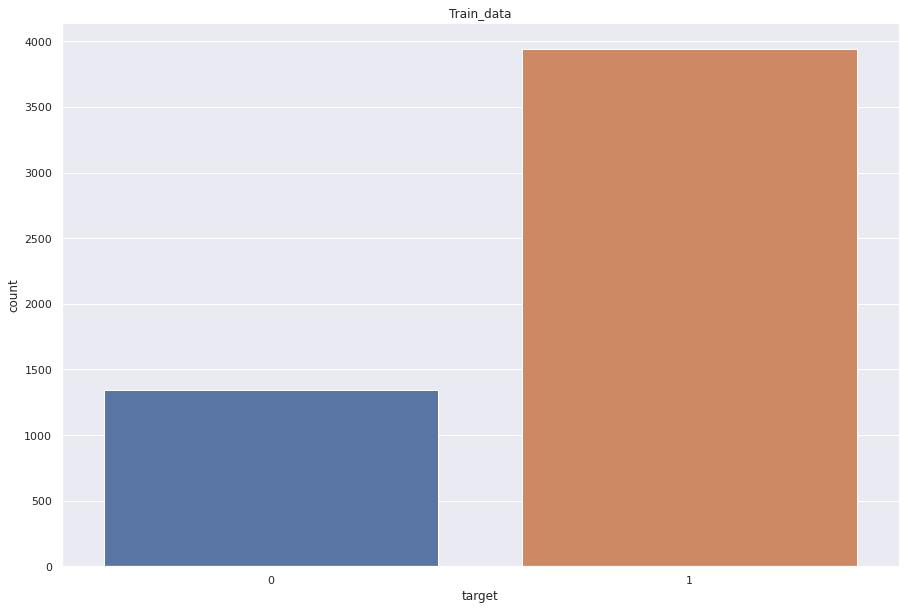

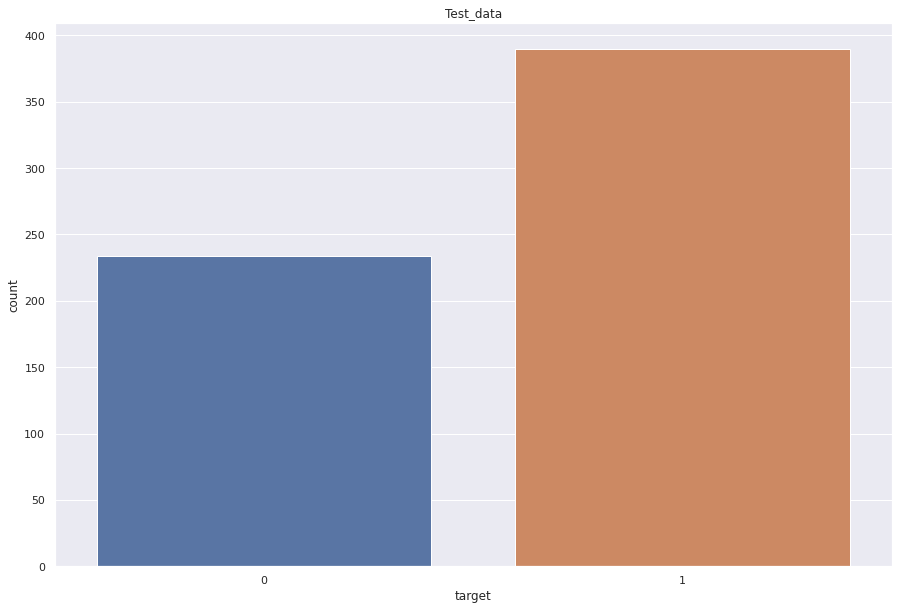

In [ ]:
train_data = train_data[['X_ray_image_name', 'class', 'target']]
test_data = test_data[['X_ray_image_name', 'class', 'target']]

print("Train_data")
print(train_data['class'].value_counts())

print("\n Test_data")
print(test_data['class'].value_counts())

plt.figure(figsize=(15,10))
sns.countplot(train_data['target']);
plt.title("Train_data")

plt.figure(figsize=(15,10))
sns.countplot(test_data['target']);
plt.title("Test_data")

In [ ]:
def read_img(filename, size, path):
    img = image.load_img(os.path.join(path, filename), target_size=size)
    img = img_to_array(img) / 255
    return img

In [ ]:
def check_dim(dir,data):
    shape_set = {1:0,2:0,3:0,4:0}
    for x in tqdm(data):
        x = os.path.join(dir, x)
        img = plt.imread(x)

        shape_set[len(np.array(img).shape)] += 1
    print(shape_set)
    print("done")
check_dim(train_img_dir,train_data['X_ray_image_name'])
check_dim(test_img_dir,test_data['X_ray_image_name'])

100%|██████████| 5286/5286 [01:45<00:00, 50.08it/s]


{1: 0, 2: 4941, 3: 345, 4: 0}
done


100%|██████████| 624/624 [00:09<00:00, 62.87it/s]

{1: 0, 2: 624, 3: 0, 4: 0}
done


In [ ]:
import torch
from torchvision.transforms import *
from torch.utils.data import Dataset, DataLoader
import cv2

class Xray_train_data(Dataset):
    def __init__(self,data):
        self.img_names = data.X_ray_image_name.values
        self.target = data.target.values
        self.dir = '/content/drive/MyDrive/Chest X ray/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train'

    def __len__(self):
        return len(self.target)

    def __getitem__(self,idx):
        img_path = os.path.join(self.dir,self.img_names[idx])
        img = torch.tensor(cv2.imread(img_path))
        target = torch.tensor(self.target[idx])
        return img, target

class Xray_test(Dataset):
    def __init__(self,data):
        self.img_names = data.X_ray_image_name.values
        self.target = data.target.values
        self.dir = '/content/drive/MyDrive/Chest X ray/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test'

    def __len__(self):
        return len(self.target)

    def __getitem__(self,idx):
        img_path = os.path.join(self.dir,self.img_names[idx])
        img = torch.tensor(cv2.imread(img_path))
        target = torch.tensor(self.target[idx])
        return img, target

In [ ]:
class Xray_train(Dataset):
    def __init__(self,data):
        self.img_names = data.X_ray_image_name.values
        self.target = data.target.values

    def __len__(self):
        return len(self.target)

    def __getitem__(self,idx):
        return img, target

In [ ]:
from sklearn.model_selection import train_test_split
from torch.utils.data import SubsetRandomSampler

train_ = Xray_train_data(train_data)
test = Xray_test(test_data)

train_idx, val_idx = train_test_split(range(len(train_)),test_size=len(test),shuffle=True,stratify=train_.target,random_state=0)

In [ ]:
def calculate_norm(dataset):

    mean_ = np.array([np.mean(x.numpy(), axis=(1, 2)) for x, _ in dataset])
    mean_r = mean_[:, 0].mean()
    mean_g = mean_[:, 1].mean()
    mean_b = mean_[:, 2].mean()

    std_ = np.array([np.std(x.numpy(), axis=(1, 2)) for x, _ in dataset])
    std_r = std_[:, 0].mean()
    std_g = std_[:, 1].mean()
    std_b = std_[:, 2].mean()

    return (mean_r, mean_g, mean_b), (std_r, std_g, std_b)

In [ ]:
import torch
from torch.utils.data import Dataset

torch.manual_seed(0)

class PneumoniaDataset(Dataset):
    def __init__(self, img, data_type='train'):
        path2data = os.path.join()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from PIL import Image
import matplotlib.pyplot as mpimg
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')


import os


"\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Chest X ray/Chest_xray_Corona_Metadata.csv")
df

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN
...,...,...,...,...,...,...
5905,5928,person1637_virus_2834.jpeg,Pnemonia,TEST,NaN,Virus
5906,5929,person1635_virus_2831.jpeg,Pnemonia,TEST,NaN,Virus
5907,5930,person1634_virus_2830.jpeg,Pnemonia,TEST,NaN,Virus
5908,5931,person1633_virus_2829.jpeg,Pnemonia,TEST,NaN,Virus


In [ ]:
df.Label.unique()

array(['Normal', 'Pnemonia'], dtype=object)

In [ ]:
print(f"Train num : {len(df[df['Dataset_type']=='TRAIN'])}\nTest num : {len(df[df['Dataset_type']=='TEST'])}")

Train num : 5286
Test num : 624


In [ ]:
import os
import pandas as pd
import time
import shutil

PATH_TRAIN = "/content/drive/MyDrive/Chest X ray/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train"
PATH_TEST = "/content/drive/MyDrive/Chest X ray/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test"

Train_Total_Imgs = len(os.listdir(PATH_TRAIN))
Test_Total_Imgs = len(os.listdir(PATH_TEST))

Train_normal = 0
Train_infected = 0
Test_normal = 0
Test_infected = 0

img = df["X_ray_image_name"]
label = df["Label"]
image_type = df["Dataset_type"]
Train_all_dir = os.listdir(PATH_TRAIN)
Test_all_dir = os.listdir(PATH_TEST)

os.mkdir("train")
os.mkdir('train/Infected')
os.mkdir("train/Normal")
os.mkdir("test")
os.mkdir('test/Infected')
os.mkdir("test/Normal")

Train_wrong_info = 0
Test_wrong_info = 0

for idx in range(len(image_type)):
    if image_type[idx] == "TRAIN":
        if img[idx] in Train_all_dir:
            if label[idx] == "Normal":
                shutil.copy(
                    PATH_TRAIN + "/" + img[idx], "train/Normal/" + img[idx]
                )
                Train_normal += 1

            else:

                shutil.copy(
                    PATH_TRAIN + "/" + img[idx], "train/Infected/" + img[idx]
                )
                Train_infected += 1

        else:
            Train_wrong_info += 1
    else:
        if img[idx] in Test_all_dir:
            if label[idx] == "Normal":
                shutil.copy(
                    PATH_TEST + "/" + img[idx], "test/Normal/" + img[idx]
                )
                Test_normal += 1

            else:

                shutil.copy(
                    PATH_TEST + "/" + img[idx], "test/Infected/" + img[idx]
                )
                Test_infected += 1

        else:
            Test_wrong_info += 1

print(f"(TRAIN DATASET) X-ray of Normal patients: {Train_normal} \n(TRAIN DATASET) X-ray of Infected patients : {Train_infected} \n(TRAIN DATASET) : {Train_normal+Train_infected} wrong_info : {Train_wrong_info}")
print(f"(TEST DATASET) X-ray of Normal patients: {Test_normal} \n(TEST DATASET) X-ray of Infected patients : {Test_infected} \n(TEST DATASET) : {Test_normal+Test_infected} wrong_info : {Test_wrong_info}")

(TRAIN DATASET) X-ray of Normal patients: 1342 
(TRAIN DATASET) X-ray of Infected patients : 3944 
(TRAIN DATASET) : 5286 wrong_info : 0
(TEST DATASET) X-ray of Normal patients: 234 
(TEST DATASET) X-ray of Infected patients : 390 
(TEST DATASET) : 624 wrong_info : 0


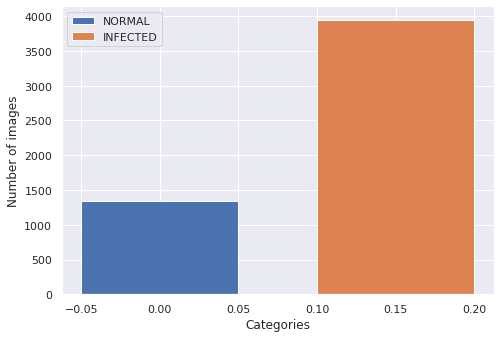

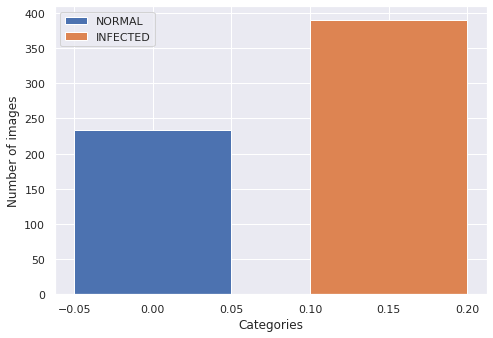

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
categories = ["NORMAL", "INFECTED"]
number_of_imgs = [Train_normal, Train_infected]
ax.bar(0, number_of_imgs[0], width=0.1)
ax.bar(0.15, number_of_imgs[1], width=0.1)
ax.legend(labels=categories)
ax.set_ylabel("Number of images")
ax.set_xlabel("Categories")
plt.show()

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
categories = ["NORMAL", "INFECTED"]
number_of_imgs = [Test_normal, Test_infected]
ax.bar(0, number_of_imgs[0], width=0.1)
ax.bar(0.15, number_of_imgs[1], width=0.1)
ax.legend(labels=categories)
ax.set_ylabel("Number of images")
ax.set_xlabel("Categories")
plt.show()

In [ ]:
import os

def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        n = 0
        for f in files:
            n = n+1
            if n>5:
                print('{}{}'.format(subindent, f),end = "  ...... \n")
                break
            print('{}{}'.format(subindent, f))

print("Input : ")
list_files("/content/drive/MyDrive/Chest X ray/Chest_xray_Corona_dataset_Summary.csv")
print("\nOutput : ")
list_files("./")

Input : 
coronahack-chest-xraydataset/
    Chest_xray_Corona_dataset_Summary.csv
    Chest_xray_Corona_Metadata.csv
    Coronahack-Chest-XRay-Dataset/
        Coronahack-Chest-XRay-Dataset/
            test/
                person1676_virus_2892.jpeg
                NORMAL2-IM-0336-0001.jpeg
                person1650_virus_2852.jpeg
                person22_virus_55.jpeg
                IM-0101-0001.jpeg
                person122_bacteria_582.jpeg  ...... 
            train/
                person1180_virus_2010.jpeg
                person1230_virus_2081.jpeg
                person1513_virus_2632.jpeg
                NORMAL2-IM-0771-0001.jpeg
                person124_virus_238.jpeg
                person746_virus_1369.jpeg  ...... 

Output : 
/
    __notebook__.ipynb
test/
    Infected/
        person86_bacteria_429.jpeg
        person82_bacteria_402.jpeg
        person153_bacteria_725.jpeg
        person45_virus_95.jpeg
        person133_bacteria_637.jpeg
        person1626_virus_28

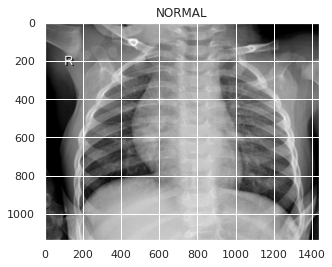

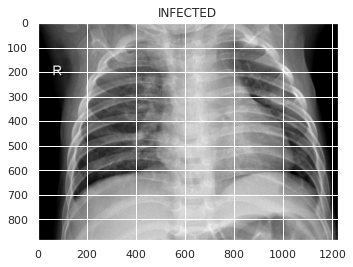

In [ ]:
import cv2

normal_sample = cv2.imread("train/Normal/"+os.listdir("train/Normal")[0])
infected_sample = cv2.imread("train/Infected/"+os.listdir("train/Infected")[0])

plt.imshow(normal_sample)
plt.title("NORMAL")
plt.show()

plt.imshow(infected_sample)
plt.title("INFECTED")
plt.show()

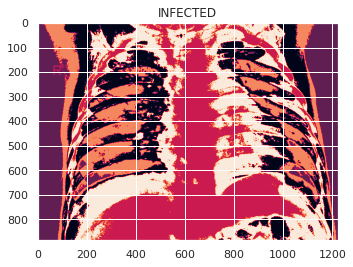

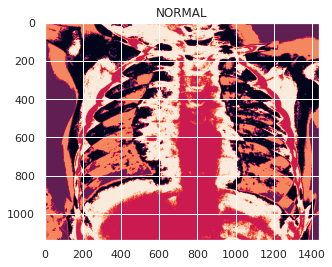

In [ ]:
from sklearn import cluster
import numpy as np

kmeans = cluster.KMeans(5)
dims = np.shape(infected_sample)
pixel_matrix = np.reshape(infected_sample, (dims[0] * dims[1], dims[2]))
clustered = kmeans.fit_predict(pixel_matrix)


clustered_img = np.reshape(clustered, (dims[0], dims[1]))
plt.imshow(clustered_img)
plt.title("INFECTED")
plt.show()

kmeans = cluster.KMeans(5)
dims = np.shape(normal_sample)
pixel_matrix = np.reshape(normal_sample, (dims[0] * dims[1], dims[2]))
clustered = kmeans.fit_predict(pixel_matrix)


clustered_img = np.reshape(clustered, (dims[0], dims[1]))
plt.imshow(clustered_img)
plt.title("NORMAL")
plt.show()

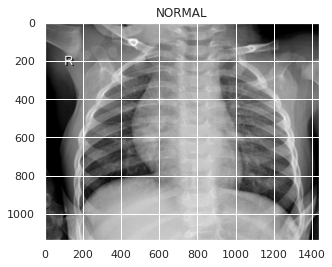

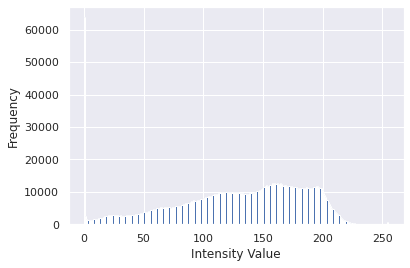

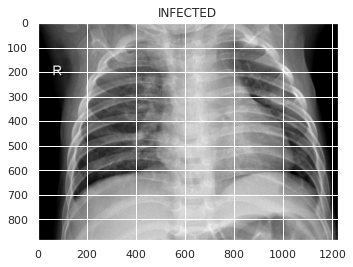

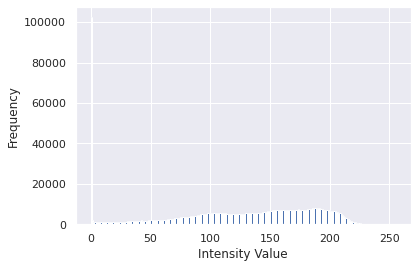

In [ ]:
from skimage import io
import matplotlib.pyplot as plt

plt.imshow(normal_sample)
plt.title("NORMAL")
plt.show()

image = io.imread("train/Normal/"+os.listdir("train/Normal")[0])
ax = plt.hist(image.ravel(), bins = 256)
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.show()

plt.imshow(infected_sample)
plt.title("INFECTED")
plt.show()

image = io.imread("train/Infected/"+os.listdir("train/Infected")[0])
ax = plt.hist(image.ravel(), bins = 256)
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import os
import time
import torchvision
from PIL import ImageFile
import matplotlib.pyplot as plt
import cv2

In [ ]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

PATH_TRAIN = "train"
PATH_TEST  = "test"
EPOCHS = 10
BATCH_SIZE = 32
TOTAL_SIZE = len(os.listdir(PATH_TRAIN + "/Normal")) + len(
    os.listdir(PATH_TRAIN + "/Infected")
)
TOTAL_TEST_SIZE = len(os.listdir(PATH_TEST + "/Normal")) + len(
    os.listdir(PATH_TEST + "/Infected")
)
STEPS_PER_EPOCH = TOTAL_SIZE // BATCH_SIZE
STEPS_PER_TEST_EPOCH = TOTAL_TEST_SIZE // BATCH_SIZE
IMAGE_H, IMAGE_W = 224, 224

In [ ]:
transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.Resize((IMAGE_H, IMAGE_W)),
        torchvision.transforms.RandomHorizontalFlip(p=0.5),
        torchvision.transforms.RandomVerticalFlip(p=0.5),
        torchvision.transforms.RandomRotation(30),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(
            mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]
        ),
    ]
)

train_dataset = torchvision.datasets.ImageFolder(root=PATH_TRAIN, transform=transform)

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=BATCH_SIZE, num_workers=1, shuffle=True
)

test_dataset = torchvision.datasets.ImageFolder(
    root=PATH_TEST, transform=transform
)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=BATCH_SIZE, num_workers=1, shuffle=True
)

In [ ]:
model = torchvision.models.resnet18(False)
feature = model.fc.in_features
model.fc = nn.Linear(feature, 2)

In [ ]:
import torch
import random
import torch.backends.cudnn as cudnn
import numpy as np
from tqdm import tqdm

torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.cuda.manual_seed_all(0)
np.random.seed(0)
cudnn.benchmark = False
cudnn.deterministic = True
random.seed(0)

In [ ]:
print(f"CUDA avaliable : {torch.cuda.is_available()}")
print(f"CUDA device num : {torch.cuda.current_device()}")
print(f"Entire CUDA nums : {torch.cuda.device_count()}")
print(f"Device name : {torch.cuda.get_device_name(0)}")
print(torch.cuda.device(0))

CUDA avaliable : True
CUDA device num : 0
Entire CUDA nums : 1
Device name : Tesla P100-PCIE-16GB


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(
    model.parameters(), lr=1e-4
)

In [ ]:
def get_test():
    test_loss = []

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    for batch_idx, (data, label) in enumerate(test_loader):
        if batch_idx == STEPS_PER_TEST_EPOCH:
            break


        with torch.no_grad():
            test_correct = 0
            test_len = 0

            data = data.to(device)
            label = label.long().to(device)
            output = model(data)
            criterion = nn.CrossEntropyLoss()
            loss = criterion(output, label)
            pred = torch.argmax(F.softmax(output, dim=1),dim=1)
            correct = pred.eq(label)

            test_len += len(label)
            test_correct += correct.sum().item()

        test_loss.append(float(loss.detach().cpu()))
    print("CORRECT: " + str(test_correct), "INCORRECT: " + str(test_len - test_correct),"TEST ACCURACY: "+str(test_correct/test_len))
    return (
            test_correct/test_len,
            sum(test_loss)/len(test_loss),
    )

In [ ]:
avg_test_loss_history = []
avg_test_accuracy_history = []
avg_train_loss_history = []
avg_train_accuracy_history = []

loss_history = []
accuracy_history = []

new_best = 0

for epoch in tqdm(range(EPOCHS)):

    print(f'======== Epoch {epoch+1} / {EPOCHS} ========')

    for batch_idx, (data, label) in enumerate(train_loader):
        if batch_idx == STEPS_PER_EPOCH:
            break
        optimizer.zero_grad()

        train_len = 0
        train_correct = 0

        data = data.to(device)
        label = label.to(device)
        output = model(data)
        loss = criterion(output, label.reshape((BATCH_SIZE,)).long())
        loss_history.append(loss.detach().cpu())

        loss.backward()
        optimizer.step()

        pred = torch.argmax(F.softmax(output, dim=1),dim=1)
        correct = pred.eq(label)

        train_len += len(label)
        train_correct += correct.sum().item()


        print(
            "\r Epoch "
            + str(epoch)
            + " Minibatch: "
            + str(batch_idx)
            + "/"
            + str(STEPS_PER_EPOCH)
            + " Loss: "
            + str(loss_history[-1]),
            end = ""

        )

        accuracy_history.append(train_correct/train_len)

    print(
        " \n Epoch "
        + str(epoch)
        + " Loss "
        + str(sum(loss_history[-STEPS_PER_EPOCH:]) / STEPS_PER_EPOCH)
        + " \n Max Loss: "
        + str(max(loss_history[-STEPS_PER_EPOCH:]))
        + " Min Loss: "
        + str(min(loss_history[-STEPS_PER_EPOCH:]))
        + " Train Accuracy: "
        + str(int(sum(accuracy_history[-STEPS_PER_EPOCH:]) / STEPS_PER_EPOCH * 100))
    )

    avg_train_loss_history.append(sum(loss_history[-STEPS_PER_EPOCH:]) / STEPS_PER_EPOCH)
    avg_train_accuracy_history.append(sum(accuracy_history[-STEPS_PER_EPOCH:]) / STEPS_PER_EPOCH)

    test_acc , test_loss  = get_test()
    print("ACCURACY : "+str(test_acc),"LOSS : "+str(test_loss))

    avg_test_accuracy_history.append(test_acc)
    avg_train_loss_history.append(test_loss)

    if test_acc>new_best:
        new_best = test_acc
        torch.save(model.state_dict(), "./model.pth") # Saving our best model

  0%|          | 0/10 [00:00<?, ?it/s]

======== Epoch 1 / 10 ========
 Epoch 0 Minibatch: 164/165 Loss: tensor(0.1585) 
 Epoch 0 Loss tensor(0.2421) 
 Max Loss: tensor(0.6960) Min Loss: tensor(0.0399) Train Accuracy: 89


 10%|█         | 1/10 [02:02<18:23, 122.63s/it]

CORRECT: 22 INCORRECT: 10 TEST ACCURACY: 0.6875
ACCURACY : 0.6875 LOSS : 0.5665840741835142
======== Epoch 2 / 10 ========
 Epoch 1 Minibatch: 164/165 Loss: tensor(0.0885) 
 Epoch 1 Loss tensor(0.1583) 
 Max Loss: tensor(0.4591) Min Loss: tensor(0.0328) Train Accuracy: 93


 20%|██        | 2/10 [03:58<15:50, 118.82s/it]

CORRECT: 25 INCORRECT: 7 TEST ACCURACY: 0.78125
ACCURACY : 0.78125 LOSS : 0.468282141183552
======== Epoch 3 / 10 ========
 Epoch 2 Minibatch: 164/165 Loss: tensor(0.0544) 
 Epoch 2 Loss tensor(0.1241) 
 Max Loss: tensor(0.4777) Min Loss: tensor(0.0176) Train Accuracy: 95


 30%|███       | 3/10 [05:56<13:47, 118.19s/it]

CORRECT: 27 INCORRECT: 5 TEST ACCURACY: 0.84375
ACCURACY : 0.84375 LOSS : 0.5468192461289858
======== Epoch 4 / 10 ========
 Epoch 3 Minibatch: 164/165 Loss: tensor(0.0635) 
 Epoch 3 Loss tensor(0.1221) 
 Max Loss: tensor(0.5613) Min Loss: tensor(0.0168) Train Accuracy: 95


 40%|████      | 4/10 [07:52<11:45, 117.62s/it]

CORRECT: 29 INCORRECT: 3 TEST ACCURACY: 0.90625
ACCURACY : 0.90625 LOSS : 0.5288273598018446
======== Epoch 5 / 10 ========
 Epoch 4 Minibatch: 164/165 Loss: tensor(0.0769) 
 Epoch 4 Loss tensor(0.1131) 
 Max Loss: tensor(0.5003) Min Loss: tensor(0.0122) Train Accuracy: 95


 50%|█████     | 5/10 [09:49<09:46, 117.23s/it]

CORRECT: 29 INCORRECT: 3 TEST ACCURACY: 0.90625
ACCURACY : 0.90625 LOSS : 0.5185895271991429
======== Epoch 6 / 10 ========
 Epoch 5 Minibatch: 164/165 Loss: tensor(0.0747) 
 Epoch 5 Loss tensor(0.1100) 
 Max Loss: tensor(0.4581) Min Loss: tensor(0.0142) Train Accuracy: 95


 60%|██████    | 6/10 [11:46<07:47, 116.99s/it]

CORRECT: 29 INCORRECT: 3 TEST ACCURACY: 0.90625
ACCURACY : 0.90625 LOSS : 0.6953596143346084
======== Epoch 7 / 10 ========
 Epoch 6 Minibatch: 164/165 Loss: tensor(0.0926) 
 Epoch 6 Loss tensor(0.0932) 
 Max Loss: tensor(0.4135) Min Loss: tensor(0.0074) Train Accuracy: 96


 70%|███████   | 7/10 [13:42<05:50, 116.94s/it]

CORRECT: 24 INCORRECT: 8 TEST ACCURACY: 0.75
ACCURACY : 0.75 LOSS : 0.6996319301818547
======== Epoch 8 / 10 ========
 Epoch 7 Minibatch: 164/165 Loss: tensor(0.2059) 
 Epoch 7 Loss tensor(0.0970) 
 Max Loss: tensor(0.3406) Min Loss: tensor(0.0074) Train Accuracy: 96


 80%|████████  | 8/10 [15:39<03:53, 116.95s/it]

CORRECT: 29 INCORRECT: 3 TEST ACCURACY: 0.90625
ACCURACY : 0.90625 LOSS : 0.46382907974092585
======== Epoch 9 / 10 ========
 Epoch 8 Minibatch: 164/165 Loss: tensor(0.0350) 
 Epoch 8 Loss tensor(0.0884) 
 Max Loss: tensor(0.3134) Min Loss: tensor(0.0063) Train Accuracy: 96


 90%|█████████ | 9/10 [17:36<01:56, 116.80s/it]

CORRECT: 26 INCORRECT: 6 TEST ACCURACY: 0.8125
ACCURACY : 0.8125 LOSS : 0.6503153804101443
======== Epoch 10 / 10 ========
 Epoch 9 Minibatch: 164/165 Loss: tensor(0.0511) 
 Epoch 9 Loss tensor(0.0828) 
 Max Loss: tensor(0.4924) Min Loss: tensor(0.0041) Train Accuracy: 96


100%|██████████| 10/10 [19:32<00:00, 117.28s/it]

CORRECT: 27 INCORRECT: 5 TEST ACCURACY: 0.84375
ACCURACY : 0.84375 LOSS : 0.5695723744207307


In [ ]:
torch.save(model.state_dict(), "./model.pth")
print("Best Accuracy : ",new_best)

Best Accuracy :  0.90625


In [ ]:
for i in avg_train_loss_history:
    print(i)

tensor(0.2421)
0.5665840741835142
tensor(0.1583)
0.468282141183552
tensor(0.1241)
0.5468192461289858
tensor(0.1221)
0.5288273598018446
tensor(0.1131)
0.5185895271991429
tensor(0.1100)
0.6953596143346084
tensor(0.0932)
0.6996319301818547
tensor(0.0970)
0.46382907974092585
tensor(0.0884)
0.6503153804101443
tensor(0.0828)
0.5695723744207307


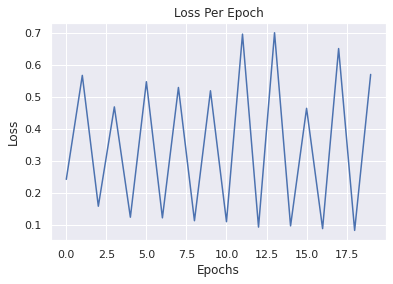

In [ ]:
plt.plot(avg_train_loss_history ,label = "Train")
plt.plot(avg_test_loss_history , label = "Test")
plt.title('Loss Per Epoch')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.savefig('full_result.png')
plt.show()

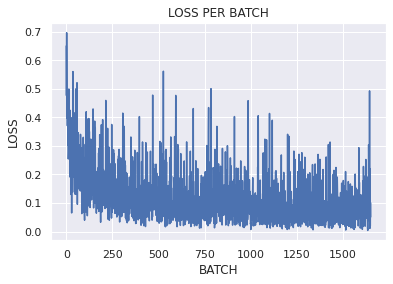

In [ ]:
plt.plot(loss_history)
plt.title('LOSS PER BATCH')
plt.xlabel("BATCH")
plt.ylabel("LOSS")
plt.savefig('batch_result.png')
plt.show()

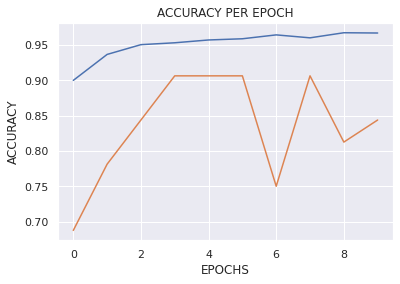

In [ ]:
plt.plot(avg_train_accuracy_history , label = "Train")
plt.plot(avg_test_accuracy_history , label = "Test")
plt.title('ACCURACY PER EPOCH')
plt.xlabel("EPOCHS")
plt.ylabel("ACCURACY")
plt.savefig('result.png')
plt.show()